### Loading the dataset

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv( './data/titanic.csv' )

In [3]:
type(titanic_df)

pandas.core.frame.DataFrame

In [4]:
titanic_df.head(5)

row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
4  Montreal, PQ / Chesterville, ON  C22         NaN     11    male

In [6]:
titanic_df[5:10]

row.names pclass  survived                                          name  \
5          6    1st         1                            Anderson, Mr Harry   
6          7    1st         1              Andrews, Miss Kornelia Theodosia   
7          8    1st         0                        Andrews, Mr Thomas, jr   
8          9    1st         1  Appleton, Mrs Edward Dale (Charlotte Lamson)   
9         10    1st         0                        Artagaveytia, Mr Ramon   

    age     embarked            home.dest   room     ticket  boat     sex  
5  47.0  Southampton         New York, NY   E-12        NaN     3    male  
6  63.0  Southampton           Hudson, NY    D-7  13502 L77    10  female  
7  39.0  Southampton          Belfast, NI   A-36        NaN   NaN    male  
8  58.0  Southampton  Bayside, Queens, NY  C-101        NaN     2  female  
9  71.0    Cherbourg  Montevideo, Uruguay    NaN        NaN  (22)    male

In [7]:
titanic_df[-1:]

row.names pclass  survived            name  age embarked home.dest room  \
1312       1313    3rd         0  Zimmerman, Leo  NaN      NaN       NaN  NaN   

     ticket boat   sex  
1312    NaN  NaN  male

In [8]:
titanic_df[-5:]

row.names pclass  survived                    name  age embarked  \
1308       1309    3rd         0      Zakarian, Mr Artun  NaN      NaN   
1309       1310    3rd         0  Zakarian, Mr Maprieder  NaN      NaN   
1310       1311    3rd         0         Zenn, Mr Philip  NaN      NaN   
1311       1312    3rd         0           Zievens, Rene  NaN      NaN   
1312       1313    3rd         0          Zimmerman, Leo  NaN      NaN   

     home.dest room ticket boat     sex  
1308       NaN  NaN    NaN  NaN    male  
1309       NaN  NaN    NaN  NaN    male  
1310       NaN  NaN    NaN  NaN    male  
1311       NaN  NaN    NaN  NaN  female  
1312       NaN  NaN    NaN  NaN    male

In [ ]:
titanic_df[:5]

In [9]:
titanic_df.shape

(1313, 11)

In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 112.9+ KB


### How many survived Vs. not survived?

In [11]:
titanic_df['survived'].value_counts()

0    864
1    449
Name: survived, dtype: int64

In [13]:
titanic_df['survived'].value_counts(normalize = True)*100

0    65.803503
1    34.196497
Name: survived, dtype: float64

### People of what age were on board?

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn

(array([ 35.,  24., 107., 138., 105.,  79.,  66.,  40.,  25.,  14.]),
 array([ 0.1667 ,  7.25003, 14.33336, 21.41669, 28.50002, 35.58335,
        42.66668, 49.75001, 56.83334, 63.91667, 71.     ]),
 <a list of 10 Patch objects>)

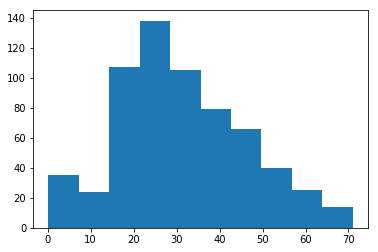

In [18]:
plt.hist( titanic_df.age.dropna() )

(array([22., 13., 12., 12., 23., 84., 65., 73., 68., 37., 50., 29., 38.,
        28., 23., 17., 18.,  7.,  9.,  5.]),
 array([ 0.1667  ,  3.708365,  7.25003 , 10.791695, 14.33336 , 17.875025,
        21.41669 , 24.958355, 28.50002 , 32.041685, 35.58335 , 39.125015,
        42.66668 , 46.208345, 49.75001 , 53.291675, 56.83334 , 60.375005,
        63.91667 , 67.458335, 71.      ]),
 <a list of 20 Patch objects>)

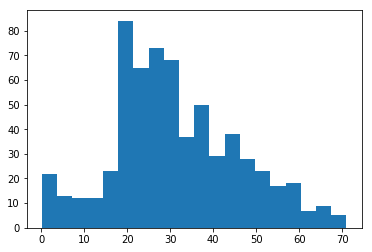

In [19]:
plt.hist( titanic_df.age.dropna(), bins = 20 )

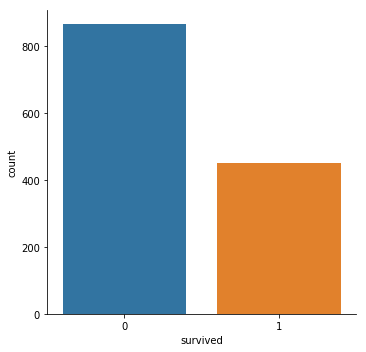

In [21]:
sn.catplot(data = titanic_df,
           x = 'survived',
           kind = 'count');

In [34]:
survial_percentage = titanic_df.survived.value_counts(normalize = True).reset_index()

In [35]:
survial_percentage

index  survived
0      0  0.658035
1      1  0.341965

In [38]:
survial_percentage.columns = ['survived', 'percent']

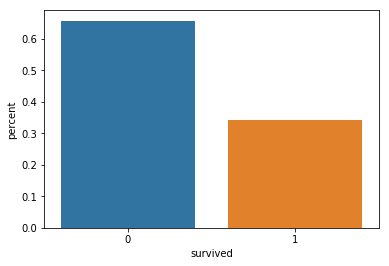

In [39]:
sn.barplot(data = survial_percentage,
           x = 'survived',
           y = 'percent');

### Sex Vs. Survived

In [24]:
pd.crosstab( titanic_df.sex, 
             titanic_df.survived,
             margins = True)

survived    0    1   All
sex                     
female    156  307   463
male      708  142   850
All       864  449  1313

In [27]:
pd.crosstab( titanic_df.sex, 
             titanic_df.survived,
             normalize = 'index')

survived         0         1
sex                         
female    0.336933  0.663067
male      0.832941  0.167059

In [29]:
pd.crosstab( titanic_df.sex, 
             titanic_df.survived,
             normalize = 'columns')

survived         0         1
sex                         
female    0.180556  0.683742
male      0.819444  0.316258

### How many children were on board?

In [40]:
children_df = titanic_df[titanic_df.age < 10]

In [41]:
children_df.shape

(46, 11)

### Average age of each passenger class

In [42]:
titanic_df.groupby('pclass')['age'].mean()

pclass
1st    39.667773
2nd    28.300314
3rd    24.519658
Name: age, dtype: float64

### How many embarked port were there?

In [43]:
titanic_df.embarked.unique()

array(['Southampton', 'Cherbourg', nan, 'Queenstown'], dtype=object)

In [44]:
titanic_df.embarked.dropna().unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

### Applying Lambda

In [45]:
titanic_df['gender'] = titanic_df.sex.map(lambda x: 1 if x == 'male' else 0 )

In [52]:
titanic_df[['sex', 'gender']].sample(10, random_state = 100)

sex  gender
173   female       0
517     male       1
1280    male       1
701   female       0
12    female       0
779   female       0
1097    male       1
225   female       0
993     male       1
299     male       1